### Develop LSTM Models For Univariate Time Series Forecasting

In [3]:
#univariate lstm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Input

In [5]:
# prepareindependent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [7]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [9]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [11]:
X.shape

(6, 3)

In [13]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [16]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 32462.8730
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31554.0469
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30701.8438
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29892.6816
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29110.2480
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 28338.6738
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 27608.0996
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26895.4766
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 26188.1348
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25512.1328
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24872.8750
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24250.9004
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23618.4902
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22958.1816
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23

### Predicting For the next 10 data

In [18]:
# demonstrate prediction for next 10 days
import numpy as np
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.72029]
1 day input [196.         210.         225.72029114]
1 day output [[237.32352]]
2 day input [210.         225.72029114 237.32351685]
2 day output [[251.98677]]
3 day input [225.72029 237.32352 251.98677]
3 day output [[267.52704]]
4 day input [237.32352 251.98677 267.52704]
4 day output [[281.43112]]
5 day input [251.98677 267.52704 281.43112]
5 day output [[297.3024]]
6 day input [267.52704 281.43112 297.3024 ]
6 day output [[313.7562]]
7 day input [281.43112 297.3024  313.7562 ]
7 day output [[329.92267]]
8 day input [297.3024  313.7562  329.92267]
8 day output [[347.4703]]
9 day input [313.7562  329.92267 347.4703 ]
9 day output [[365.61935]]
[225.72029, 237.32352, 251.98677, 267.52704, 281.43112, 297.3024, 313.7562, 329.92267, 347.4703, 365.61935]


In [21]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

### Visualizaing The Output

In [24]:
import matplotlib.pyplot as plt

In [26]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

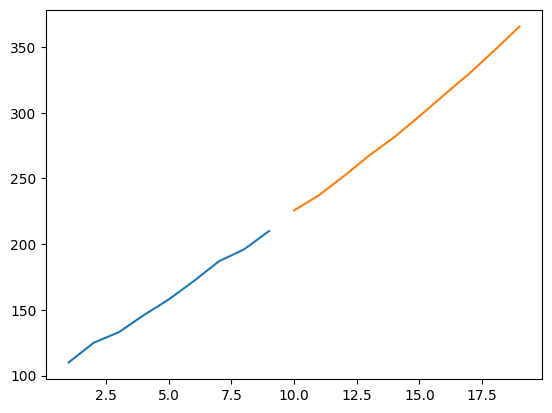

In [28]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)